In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


*Inspecting the data*

In [5]:
species_count = len(species)
print(species_count)

5824


In [6]:
species_type = species.category.unique()
print (species_type)

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [7]:
conservation_statuses = species.conservation_status.unique()
print(conservation_statuses)

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [8]:
#Analyze species conservation status
conservation_counts = species.groupby('conservation_status').scientific_name.count().reset_index()
conservation_counts

,conservation_status,scientific_name
0,Endangered,16
1,In Recovery,4
2,Species of Concern,161
3,Threatened,10


In [9]:
species.fillna('No Intervention', inplace = True)

In [10]:
conservation_counts_fixed = species.groupby('conservation_status').scientific_name.count().reset_index()
conservation_counts_fixed

,conservation_status,scientific_name
0,Endangered,16
1,In Recovery,4
2,No Intervention,5633
3,Species of Concern,161
4,Threatened,10


*Data Visualization*

In [11]:
#Plotting Conservation Status by Species
protection_counts = species.groupby('conservation_status')\
.scientific_name.count().reset_index().sort_values(by='scientific_name')
protection_counts

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,16
3,Species of Concern,161
2,No Intervention,5633


Conservation Status by Species


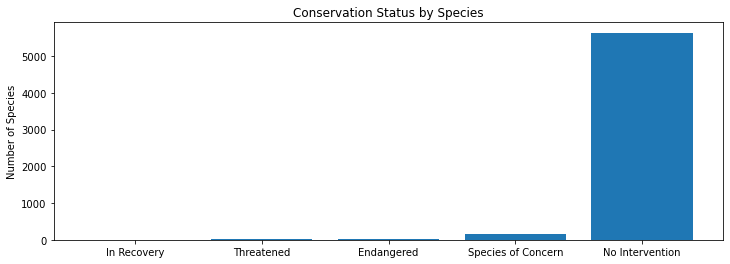

In [15]:
plt.figure(figsize=(12, 4))
ax = plt.subplot()

plt.bar(range(len(protection_counts)), protection_counts.scientific_name.values)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status.values)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
labels = [e.get_text() for e in ax.get_xticklabels()]
print(ax.get_title())
plt.show()

In [16]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [19]:
category_counts = species.groupby(['category', 'is_protected'])\
.scientific_name.count().reset_index()

category_counts

,category,is_protected,scientific_name
0,Amphibian,False,73
1,Amphibian,True,7
2,Bird,False,442
3,Bird,True,79
4,Fish,False,116
5,Fish,True,11
6,Mammal,False,176
7,Mammal,True,38
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


In [18]:
category_pivot = category_counts.pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
category_pivot

is_protected,category,False,True
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


In [20]:
category_pivot.columns = ['category', 'not_protected', 'protected']
category_pivot['percent_protected'] = category_pivot.protected / (category_pivot.protected + category_pivot.not_protected)
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,73,7,0.087500
1,Bird,442,79,0.151631
2,Fish,116,11,0.086614
3,Mammal,176,38,0.177570
4,Nonvascular Plant,328,5,0.015015
5,Reptile,74,5,0.063291
6,Vascular Plant,4424,46,0.010291


*Hypothesis test using chi-square test*

In [21]:
contingency =[[30, 146],
             [75, 413]]

chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.6875948096661336


In [22]:
contingency2 = [[5, 73],
               [30, 146]]

chi2, pval_reptile_mammal, dof, expected = chi2_contingency(contingency2)
print(pval_reptile_mammal)

0.03835559022969898
